## EDA - Startup Funding In India

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many startups per year?](#section401)<br/>
    - 4.2 [In which Industry most startups are opening?](#section402)<br/>
    - 4.3 [which region/city is preferred for startup?](#section403)<br/>
    - 4.4 [Which type of funding is most given to startups?](#section404)<br/>
    - 4.5 [How much funding is given to startup?](#section405)<br/>
5. [Conclusions](#section5)<br/>  

<a id="section1"></a>

## 1. Problem Statement

In this notebook we will do EDA on data of startups started between 2015-2017.

<a id=section2></a>

## 2. Data Loading and Description

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pandas_profiling

### Importing the DataSet

In [2]:
startup_funding = pd.read_csv("startup_funding.csv")

<a id=section3></a>

## 3.Data Profiling

![Indian-Startups.jpg](images/Indian-Startups.jpg)

<a id=section301></a>

## 3.1 Understanding the data

In [3]:
startup_funding.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
startup_funding.shape

(2372, 10)

In [5]:
startup_funding.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [6]:
startup_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [7]:
startup_funding.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [8]:
startup_funding.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

<a id=section302></a>

## 3.2 Pre Profiling

In [9]:
preProfile = pandas_profiling.ProfileReport(startup_funding)
preProfile.to_file("startup_funding_preprofiling.html")

<a id=section303 ></a>

## 3.3 Preprocessing

In [10]:
startup_funding.rename(columns={"CityLocation": "City"}, inplace=True)

- __Rename__ CityLocation to City column.

In [11]:
startup_funding.drop("Remarks", axis=1, inplace=True)

- Remove column remarks as it has __83%__ of __missing values__.

In [12]:
startup_funding.City.fillna("Other", inplace= True)

- Filling Missing City Data with __'Other'__.

In [13]:
startup_funding.IndustryVertical.fillna("Other",inplace = True)

In [14]:
startup_funding["IndustryVertical"] = startup_funding.IndustryVertical.str.capitalize()

- Filling Missing Industry Vertical with Other and then Capitalizing values to remove duplicacy.

In [15]:
startup_funding.InvestmentType.replace("SeedFunding", "Seed Funding", inplace= True)
startup_funding.InvestmentType.replace("PrivateEquity", "Private Equity", inplace= True)
startup_funding.InvestmentType.replace("Crowd funding", "Crowd Funding", inplace= True)
startup_funding["InvestmentType"].fillna(startup_funding["InvestmentType"].mode()[0], inplace=True)

- In InvestmentType column replacing _SeedFunding, PrivateEquity, Crowd funding_ with _Seed Funding, Private Equity, Crowd Funding_ and filling NAN value with __Mode__ value.

In [16]:
startup_funding["InvestorsName"] = startup_funding.InvestorsName.str.capitalize()
startup_funding["SubVertical"] = startup_funding.SubVertical.str.capitalize()

- _InvestorsName, SubVertical_ values are capitalized to remove duplicacy due to spellings.

In [17]:
startup_funding.SubVertical.fillna("Other", inplace = True)

- Filling _SubVertical_ Missing Values with Other.

In [18]:
startup_funding["AmountInUSD"] = startup_funding.AmountInUSD.str.replace(",", "").astype(float)
startup_funding.AmountInUSD.fillna(startup_funding.AmountInUSD.mean(), inplace=True)

- Converting Amount from string to float and filling missing values with mean

In [19]:
startup_funding['Date'] = startup_funding.Date.str.replace(".","/")
startup_funding['Date'] = startup_funding.Date.str.replace("//","/")

- Correcting Data formats for Date Value.

In [20]:
startup_funding['Date'] = pd.to_datetime(startup_funding['Date'])

- Converting string to DateTime datatype.

<a id=section304></a>

## 3.4 Post Pandas Profiling

In [21]:
postProfile = pandas_profiling.ProfileReport(startup_funding)
postProfile.to_file("startup_funding_post_profiling.html")

<a id=section4></a>

## 4. Questions

<a id=section401></a>

## 4.1 How many startups per year?

Text(0, 0.5, 'Startups')

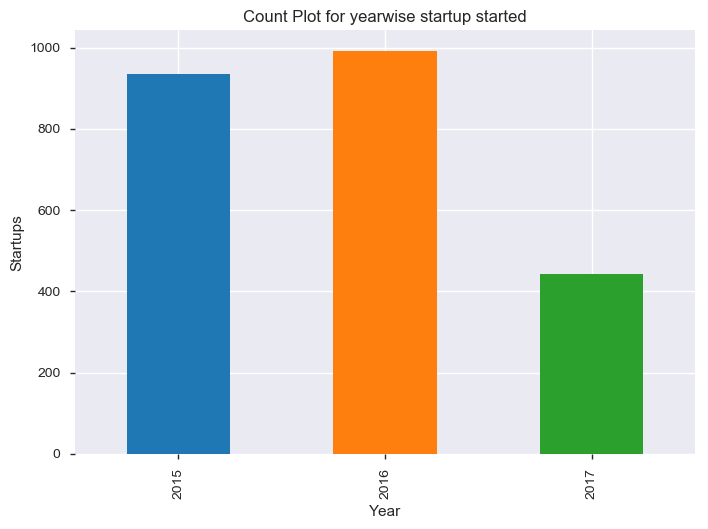

In [22]:
df = startup_funding.groupby([startup_funding.Date.dt.year])["Date"].count()
plt = df.plot(kind="bar", title = "Count Plot for yearwise startup started")
plt.set_xlabel("Year")
plt.set_ylabel("Startups")

- Compare to __2016__ there is big drop in startup number in __2017__.

<a id=section402></a>

## 4.2 In which Industry most startups are opening?

Text(0.5, 1.0, 'Top Industry Verticals in startups')

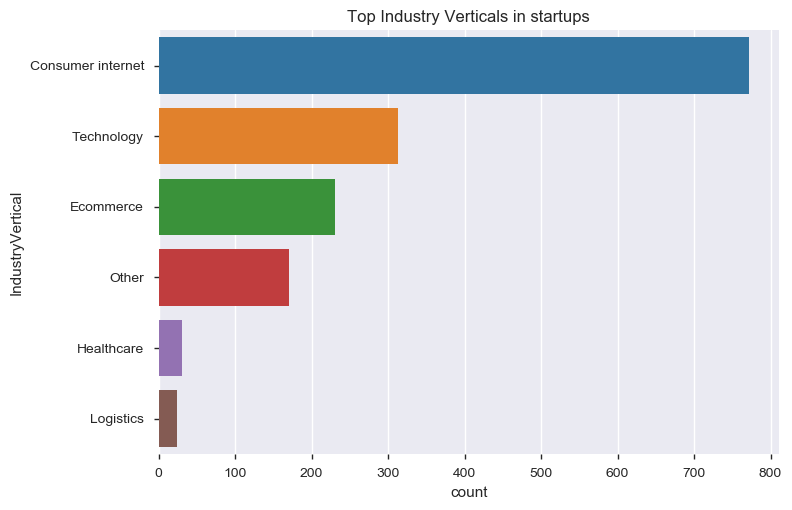

In [23]:
plt = sns.countplot(y="IndustryVertical", data=startup_funding, order=startup_funding.IndustryVertical.value_counts().iloc[0:6].index)
plt.set_title("Top Industry Verticals in startups")

- It stats that in India __most__ startups are opening in __Consumer Internet__ Industry. Then __Technology__ and __Ecommerce__ are other competetors.

<a id=section403></a>

## 4.3 which region/city is preferred for startup?

Text(0.5, 1.0, 'Popular Cities for Startups')

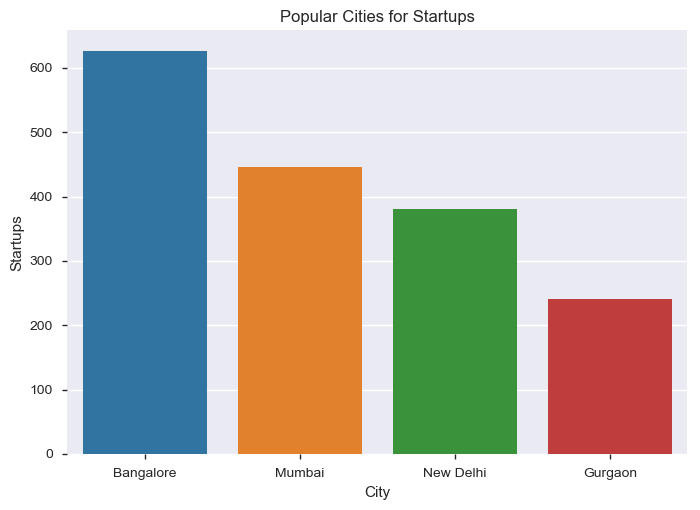

In [24]:
plt = sns.countplot("City", data=startup_funding, order=startup_funding.City.value_counts().iloc[:4].index)
plt.set_ylabel("Startups")
plt.set_title("Popular Cities for Startups")

- Most startups open in __Bangalore__. Mumbai and Delhi NCR is second choice.

<a id=section404></a>

## 4.4 Which type of funding is most given to startups?

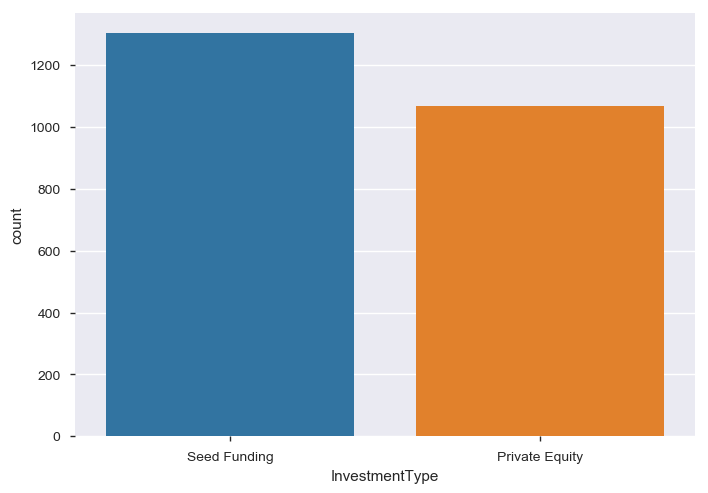

In [25]:
sns.countplot("InvestmentType", data=startup_funding, order=startup_funding.InvestmentType.value_counts().iloc[0:2].index)

- In most of the startups __Seed Funding__ is preferred by Inverstors

<a id=section405></a>

## 4.5 How much funding is given to startup?

Text(0.5, 1.0, 'Funding Amount Distribution')

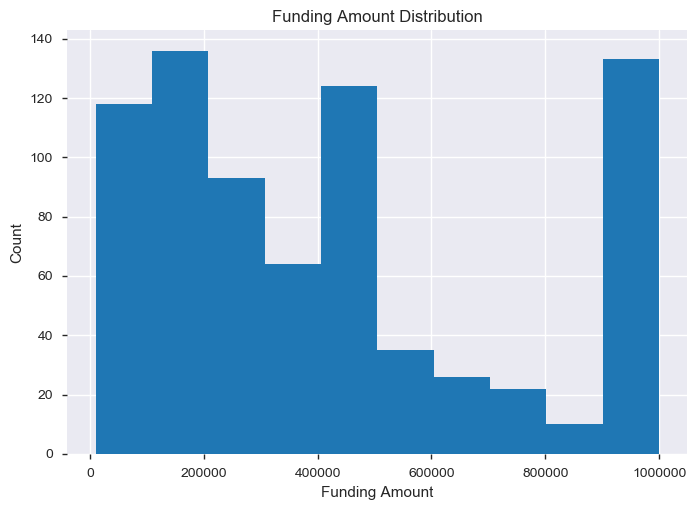

In [26]:
plt = startup_funding.AmountInUSD.hist(range=[10000,1000000])
plt.set_xlabel("Funding Amount")
plt.set_ylabel("Count")
plt.set_title("Funding Amount Distribution")

- From this histogram we can see that either most of the startups get funding __below 200000__ or __1000000__.

<a id=section5></a>

### Conclusion

- In 2017, number of starup reduced compare to 2016 and 2017
- Most startup are in Consumer Internet and Tecnology domain.
- Bangalore, Mumbai and Delhi NCR are three main cities for any startup.
- Most of the startups get seed funding.